<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/OPTIMIZATION/Simulated_Annealing_(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [219]:
def boltzmann(deltaE,  T, k=1):
  return np.exp(-deltaE/(k*T))

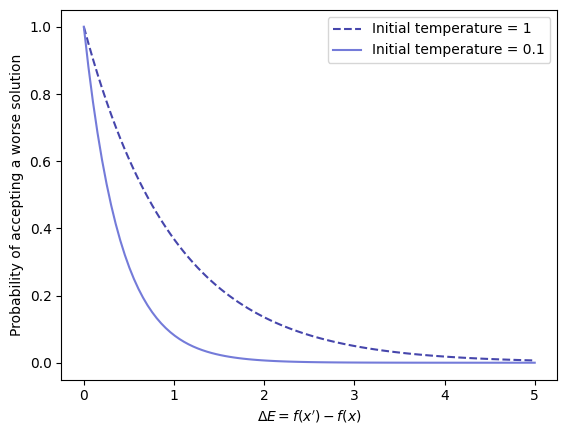

In [220]:
Ti = 100
energies = np.linspace(0,5,100)
probabilities = [boltzmann(energy, 1, k=1) for energy in energies]
probabilities_ = [boltzmann(energy, 0.1, k=4) for energy in energies]
plt.plot(energies, probabilities, label='Initial temperature = 1', color='#4646AC', linestyle='dashed')
plt.plot(energies, probabilities_, label='Initial temperature = 0.1', color='#747BD9')
plt.ylabel("Probability of accepting a worse solution")
plt.xlabel("$\Delta E =  f(x') - f(x)$")
plt.legend()
plt.savefig("BoltzmanDistribution.eps")

Solve the following  problem:

\begin{equation}
f(x) = 81x - 1.5x^{2} - 1000
\end{equation}

\begin{equation}
f'(x) = 81 - 3x
\end{equation}


Therefore the analytical solution is:
\begin{equation}
x^{*} = 27
\end{equation}



We are going to uses **simulated annealing**.

In [221]:
def fitness(x):
  return 81*x[0] - (1.5)*(x[0]**2) - 1000,

In [222]:
fitness([27])

(93.5,)

In [223]:
# Module of Simulated Anealing Fitness Function...

import numpy as np
import random

#####################################
# Simulated annealing               #
#####################################
def search(solution, alpha=0.01):
  return solution + np.random.randn(len(solution)) * alpha



def boltzmann(deltaE,  T, k=1):
  return np.exp(deltaE/(k*T)) # drop negative to maximize..


def SA(solution, search,
         Ti,
         Tf,
         cooling_rate,
         fitnessFunction,
         seed=123,
         reduce_temp=0.01,
         alpha=0.01):
  #print('initial  fitness:',fitnessFunction(solution))
  record = {}
  record['Major'] = (fitnessFunction(solution), solution)
  T = Ti
  while T>Tf:
    for _ in range(cooling_rate):
      solution_temp  = search(solution, alpha=alpha)
      E0, E1 = fitnessFunction(solution)[0], fitnessFunction(solution_temp)[0]
      if E1 >= E0 or random.uniform(0,1) < boltzmann(E1-E0, T):
        solution = solution_temp
      if fitnessFunction(solution)[0] > record['Major'][0][0]:
           record['Major'] = (fitnessFunction(solution), solution)
    T = T - reduce_temp
    #print(fitnessFunction(solution))
  return record # dictionary

In [224]:
SA(solution = [1],
   search=search,
   Ti =50,
   Tf = 0,
   cooling_rate=25,
   reduce_temp=0.01,
   alpha = 0.5,
   fitnessFunction = fitness)

{'Major': ((93.49999999999636,), array([27.00000157]))}

In [225]:
exp_results = []
trials  = 25
for trial in range(trials):
  results = SA(solution = [1],
   search=search,
   Ti =20,
   Tf = 0,
   cooling_rate=25,
   reduce_temp=0.01,
   alpha = 0.5,
   fitnessFunction = fitness)
  results
  exp_results.append(results['Major'][1][0])


In [226]:
np.array(exp_results).mean()

26.99999750202589

In [227]:
# Maximize a function of form.
def f(x,y, C=100):
  return np.sqrt(C - (x**2) - (y**2))

def f_array(sol, C=100):
    x, y = sol[0], sol[1]
    return max(C - (x ** 2) - (y ** 2), 0),  # Ensuring non-negative argument


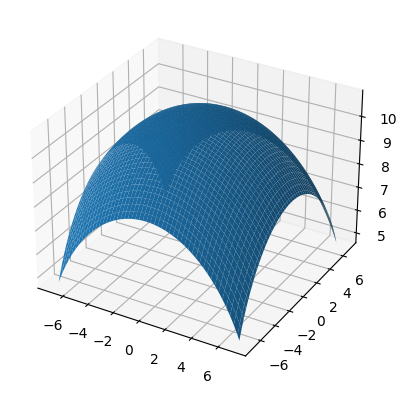

In [228]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = np.linspace(-7,7,100)
y = np.linspace(-7,7,100)
x, y = np.meshgrid(x,y)
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, f(x,y,120))
plt.show()

In [229]:
SA(solution = [6,5],
   search=search,
   Ti =50,
   Tf = 0,
   cooling_rate=30,
   reduce_temp=0.01,
   alpha = 0.01,
   fitnessFunction = f_array)

{'Major': ((99.77624941866537,), array([0.37272502, 0.29125013]))}